In [1]:
# importing the libraries
import tweepy
import configparser
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# Initialising credentials for authorization

config = configparser.ConfigParser()
config.read('config.ini')

consumer_key = config['twitter']['consumer_key']
consumer_secret = config['twitter']['consumer_secret']
access_token = config['twitter']['access_token']
access_token_secret = config['twitter']['access_token_secret']

In [4]:
# setting the api 
try:
    # authorizing api 
    auth = tweepy.OAuthHandler(consumer_key , consumer_secret)

    # setting access tokens
    auth.set_access_token(access_token , access_token_secret)

    # create api object
    api = tweepy.API(auth , wait_on_rate_limit = True)

except:
    print("Authorization Failed...")    

In [38]:
#Extracting the tweets from a user
#name = input("Enter the username of person : ")
keyword = input("Enter the keyword or hash or userhandle : ")
limit = int(input("Enter the number of tweets to be extracted : "))
tweets = tweepy.Cursor(api.search_tweets,q = keyword , lang = 'en',count = 100 ,
tweet_mode = 'extended').items(limit)

In [39]:
# Creating a dataframe
data =[]
for tweet in tweets:
    data.append([tweet.user.screen_name,tweet.full_text])

dafa = pd.DataFrame(data,columns = ['users','tweets'])

dafa.head

<bound method NDFrame.head of                users                                             tweets
0            Wagubi1  RT @unwomenuganda: Under the LEAP program, @IS...
1    KatieKi69765929  RT @GordonGChang: #Tedros in January 2020, spr...
2    RachelC78393492  RT @hartman_bill: #COVID19 is surging. \n\nPro...
3          chrisw442  RT @Sky_Lee_1: Please sign petition for indoor...
4    KatieKi69765929  RT @GordonGChang: #Biden now wants to give mor...
..               ...                                                ...
240   drjcarlosherre  RT @_Anesthesiology: Alejandra Garza, M.D. — a...
241   Kieron_Ashwood  RT @DE2344: @jonlevyBU Video to help convey th...
242   koreatimescokr  #SouthKorea's new #COVID19 cases fell below 20...
243  fitterhappierAJ  RT @tmprowell: 5/21 update for those tuning in...
244         CyHusain  RT @CyHusain: See @sputnikvaccine #Chechnya, R...

[245 rows x 2 columns]>

In [40]:
# Function for Cleaning the tweets 
def tweets_cleaner(text):
    text = re.sub(r'@[A-za-z0-9]+','',text)
    text = re.sub(r'#','',text)
    text = re.sub(r'RT[\s]+','',text)
    text = re.sub(r'https?:\/\/\s+','',text)
    text = text.lower()
    return text


In [41]:
# Create a clean tweets string
dafa['tweets'] = dafa['tweets'].apply(tweets_cleaner)

#Display cleaned tweets
dafa.head

<bound method NDFrame.head of                users                                             tweets
0            Wagubi1  : under the leap program,  received $50,000 to...
1    KatieKi69765929  : tedros in january 2020, spread china’s narra...
2    RachelC78393492  : covid19 is surging. \n\nprotection provides ...
3          chrisw442  : please sign petition for indoor masks to hel...
4    KatieKi69765929  : biden now wants to give more power to a body...
..               ...                                                ...
240   drjcarlosherre  : alejandra garza, m.d. — a first-year residen...
241   Kieron_Ashwood  :  video to help convey the concept. \n\nunive...
242   koreatimescokr  southkorea's new covid19 cases fell below 20,0...
243  fitterhappierAJ  : 5/21 update for those tuning in to our covid...
244         CyHusain  : see  chechnya, russia &amp; donbas are not a...

[245 rows x 2 columns]>

In [42]:
# Creating subjectivity and polarity of tweet
def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getpolarity(text):
    return TextBlob(text).sentiment.polarity

dafa['subjectivity'] = dafa['tweets'].apply(getsubjectivity)
dafa['polarity'] = dafa['tweets'].apply(getpolarity)

dafa

,users,tweets,subjectivity,polarity
0,Wagubi1,": under the leap program, received $50,000 to...",0.088889,0.077778
1,KatieKi69765929,": tedros in january 2020, spread china’s narra...",0.000000,0.000000
2,RachelC78393492,: covid19 is surging. \n\nprotection provides ...,0.900000,0.300000
3,chrisw442,: please sign petition for indoor masks to hel...,0.000000,0.000000
4,KatieKi69765929,: biden now wants to give more power to a body...,0.366667,0.400000
...,...,...,...,...
240,drjcarlosherre,": alejandra garza, m.d. — a first-year residen...",0.000000,0.000000
241,Kieron_Ashwood,: video to help convey the concept. \n\nunive...,0.000000,0.000000
242,koreatimescokr,"southkorea's new covid19 cases fell below 20,0...",0.262626,0.128788
243,fitterhappierAJ,: 5/21 update for those tuning in to our covid...,0.000000,0.000000


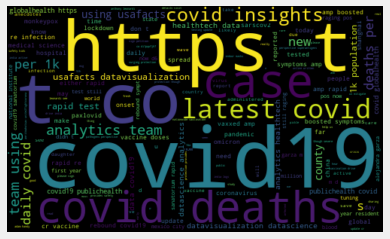

In [43]:
# creating word cloud
allwords = ' '.join(twts for twts in dafa['tweets'])
wordCloud = WordCloud(width = 500 , height = 300 , random_state = 21 , max_font_size = 110).generate(allwords)

plt.imshow(wordCloud , interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [44]:
# Defining analysis on the basis of polarity
def getanalysis(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'    

dafa['Analysis'] = dafa['polarity'].apply(getanalysis)
dafa

,users,tweets,subjectivity,polarity,Analysis
0,Wagubi1,": under the leap program, received $50,000 to...",0.088889,0.077778,Positive
1,KatieKi69765929,": tedros in january 2020, spread china’s narra...",0.000000,0.000000,Neutral
2,RachelC78393492,: covid19 is surging. \n\nprotection provides ...,0.900000,0.300000,Positive
3,chrisw442,: please sign petition for indoor masks to hel...,0.000000,0.000000,Neutral
4,KatieKi69765929,: biden now wants to give more power to a body...,0.366667,0.400000,Positive
...,...,...,...,...,...
240,drjcarlosherre,": alejandra garza, m.d. — a first-year residen...",0.000000,0.000000,Neutral
241,Kieron_Ashwood,: video to help convey the concept. \n\nunive...,0.000000,0.000000,Neutral
242,koreatimescokr,"southkorea's new covid19 cases fell below 20,0...",0.262626,0.128788,Positive
243,fitterhappierAJ,: 5/21 update for those tuning in to our covid...,0.000000,0.000000,Neutral


In [45]:
# Creating a sorted dataframe
sorteddafa = dafa.sort_values(by=['polarity'])

In [46]:
#printing +ve , -ve , neutral tweets seperately
def positweets():
    j = 1
    for i in range(0 , sorteddafa.shape[0]):
        if (sorteddafa['Analysis'][i] == 'Positive'):
            print(str(j) + ') ' + sorteddafa['tweets'][i])
            print()
            j = j + 1

def negtweets():
    j = 1
    for i in range(0 , sorteddafa.shape[0]):
        if (sorteddafa['Analysis'][i] == 'Negative'):
            print(str(j) + ') ' + sorteddafa['tweets'][i])
            print()
            j = j + 1

def neutweets():
    j = 1
    for i in range(0 , sorteddafa.shape[0]):
        if (sorteddafa['Analysis'][i] == 'Neutral'):
            print(str(j) + ') ' + sorteddafa['tweets'][i])
            print()
            j = j + 1    

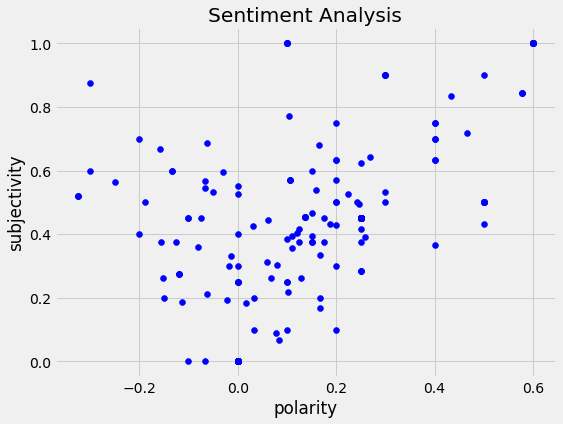

In [47]:
#plot polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0,dafa.shape[0]):
    plt.scatter(dafa['polarity'][i] , dafa['subjectivity'][i],color='Blue')
plt.title('Sentiment Analysis') 
plt.xlabel('polarity')
plt.ylabel("subjectivity") 
plt.show()  

In [48]:
# get percent of possitive negative and neutral tweets 

def pospercent():
    ptweets = dafa[dafa.Analysis == 'Positive']
    ptweets = ptweets['tweets'] 
    print(round((ptweets.shape[0] / dafa.shape[0]) * 100 , 1))

def negpercent():
    ptweets = dafa[dafa.Analysis == 'Negative']
    ptweets = ptweets['tweets'] 
    print(round((ptweets.shape[0] / dafa.shape[0]) * 100 , 1)) 

def neupercent():
    ptweets = dafa[dafa.Analysis == 'Neutral']
    ptweets = ptweets['tweets'] 
    print(round((ptweets.shape[0] / dafa.shape[0]) * 100 , 1))  

pospercent()
negpercent()
neupercent()         

51.8
14.3
33.9


In [49]:
#show the value count
dafa['Analysis'].value_counts()

Positive    127
Neutral      83
Negative     35
Name: Analysis, dtype: int64

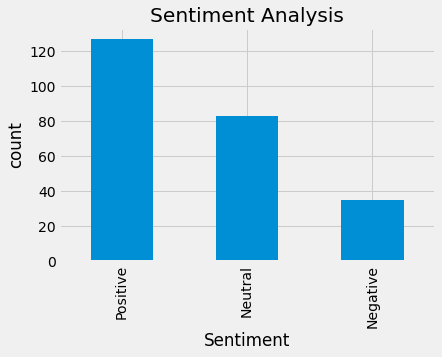

In [50]:
#plot and visualize the count
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('count')
dafa['Analysis'].value_counts().plot(kind = 'bar')
plt.show()